<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/FiltroColaborativoNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A proposta deste notebook é explorar e analisar o dataset netflix_titles.csv com diversas técnicas e abordagens, para entender melhor o catálogo de títulos disponíveis na Netflix. Aqui estão os principais objetivos alcançados:

Redução de Dimensionalidade: Utilizamos técnicas como PCA, SVD e Autoencoder para reduzir a dimensionalidade dos dados, facilitando a visualização e análise de grandes volumes de informações.

Clustering: Aplicamos o algoritmo de clustering K-Means aos dados reduzidos para identificar agrupamentos naturais entre os títulos, com base em características como gênero.

Análises Exploratórias:

Distribuição de Tipos de Conteúdo: Analisamos a proporção de filmes e séries no catálogo da Netflix.

Anos de Lançamento: Investigamos a distribuição dos títulos ao longo dos anos, identificando tendências nos lançamentos.

Distribuição por Gênero: Exploramos os gêneros mais comuns entre os títulos disponíveis.

Títulos por País: Examinamos a origem geográfica dos títulos, destacando os principais países produtores de conteúdo.

Visualizações: Utilizamos gráficos para representar visualmente as distribuições e clusters, facilitando a interpretação dos dados e insights obtidos.

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt


In [15]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('netflix_titles[1].csv')

# Usar a coluna 'listed_in' (gêneros) para criar uma matriz de similaridade
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
genre_matrix = vectorizer.fit_transform(df['listed_in'].fillna(''))

# Converting to DataFrame for better handling
genre_df = pd.DataFrame(genre_matrix.toarray(), index=df['title'], columns=vectorizer.get_feature_names_out())
print("Matriz de Gêneros:")
print(genre_df.head())


Matriz de Gêneros:
                        anime features   children & family movies  \
title                                                               
Dick Johnson Is Dead                 0                          0   
Blood & Water                        0                          0   
Ganglands                            0                          0   
Jailbirds New Orleans                0                          0   
Kota Factory                         0                          0   

                        classic & cult tv   classic movies   comedies  \
title                                                                   
Dick Johnson Is Dead                    0                0          0   
Blood & Water                           0                0          0   
Ganglands                               0                0          0   
Jailbirds New Orleans                   0                0          0   
Kota Factory                            0                0 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
# Normalização
scaler = StandardScaler()
data_normalized = scaler.fit_transform(genre_df)

# PCA
pca = PCA(n_components=2)  # Reduzir para 2 dimensões para plotagem
data_pca = pca.fit_transform(data_normalized)
print(f"Dados após PCA: {data_pca.shape}")


Dados após PCA: (8807, 2)


In [24]:
# SVD (TruncatedSVD)
svd = TruncatedSVD(n_components=2)
data_svd = svd.fit_transform(data_normalized)
print(f"Dados após SVD: {data_svd.shape}")


Dados após SVD: (8807, 2)


In [25]:
# Autoencoder
input_dim = data_normalized.shape[1]
encoding_dim = 2  # Reduzir para 2 dimensões para plotagem

# Arquitetura do Autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compilação e treino
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_normalized, data_normalized, epochs=10, batch_size=32, verbose=1)

# Obter os dados reduzidos
data_autoencoder = encoder.predict(data_normalized)
print(f"Dados após Autoencoder: {data_autoencoder.shape}")


Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1866
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0549
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9812
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1018
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9696
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9661
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9913
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0179
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0056
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9655
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Dados após Autoencoder: (8807, 2)


In [27]:
# Escolha um dos dados reduzidos (por exemplo, data_pca)
data_reduced = data_pca  # ou data_svd, ou data_autoencoder se estiverem em 2D

# Definir o número de clusters
num_clusters = 5

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_reduced)

# Obter os rótulos e centroides dos clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Adicionar rótulos aos dados originais
df['cluster'] = labels
print("Dados com Rótulos de Clusters:")
print(df.head())

# Calcular distância entre os centroides dos clusters
distancias = np.zeros((num_clusters, num_clusters))
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        distancias[i, j] = euclidean(centroids[i], centroids[j])
        distancias[j, i] = distancias[i, j]

print("Distâncias entre os Clusters:")
print(distancias)


Dados com Rótulos de Clusters:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons  

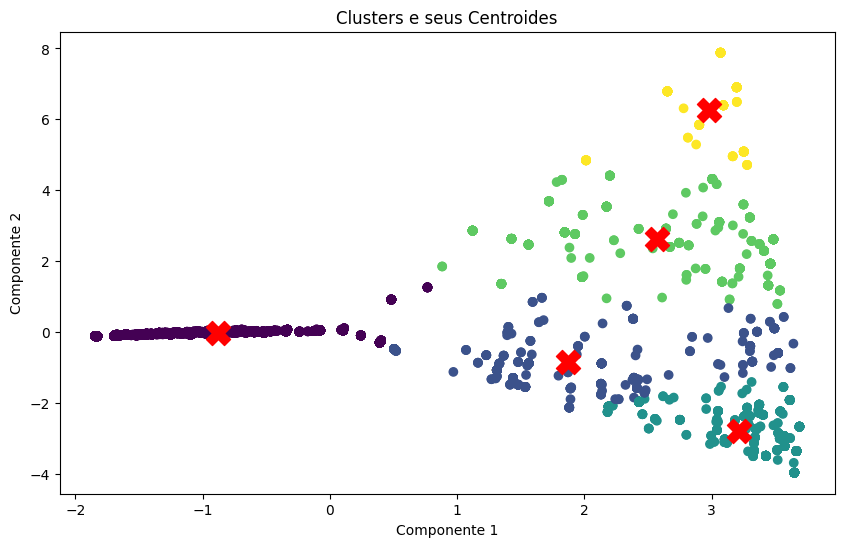

In [29]:
# Plotar os clusters (somente para dados 2D)
if data_reduced.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    plt.title('Clusters e seus Centroides')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()
else:
    print("Os dados não estão em 2 dimensões para plotagem.")


Distribuição de Tipos de Conteúdo:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


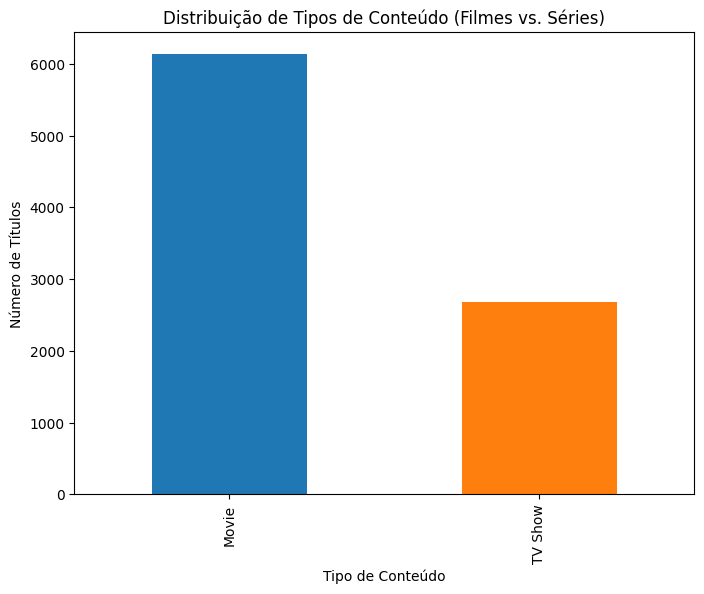

In [30]:
# Contar tipos de conteúdo (Filmes e Séries)
tipo_conteudo = df['type'].value_counts()
print("Distribuição de Tipos de Conteúdo:")
print(tipo_conteudo)

# Visualização da Distribuição
plt.figure(figsize=(8, 6))
tipo_conteudo.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Tipos de Conteúdo (Filmes vs. Séries)')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Número de Títulos')
plt.show()


Distribuição dos Anos de Lançamento:
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


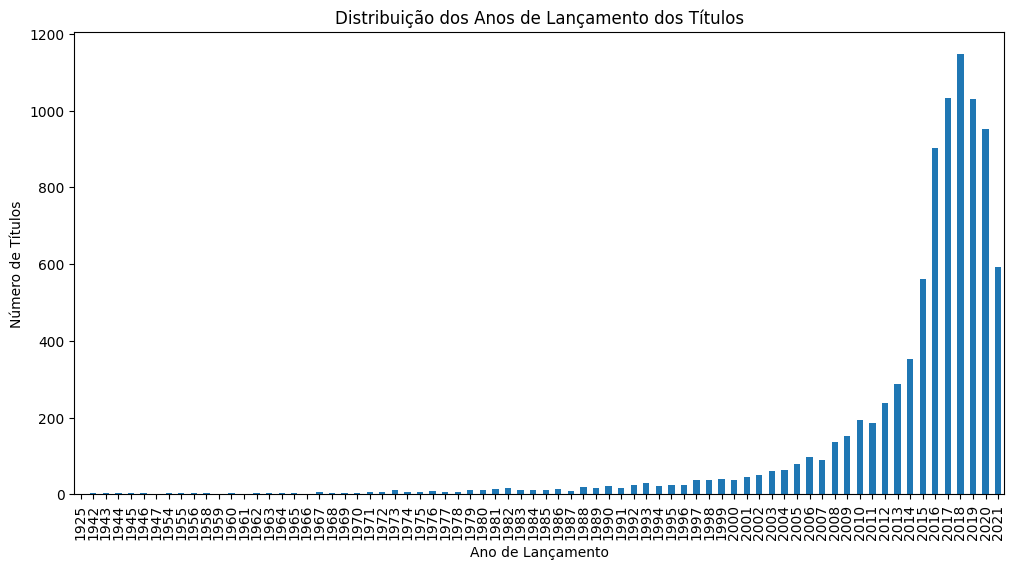

In [31]:
# Contagem de títulos por ano de lançamento
anos_lancamento = df['release_year'].value_counts().sort_index()
print("Distribuição dos Anos de Lançamento:")
print(anos_lancamento)

# Visualização da Distribuição dos Anos de Lançamento
plt.figure(figsize=(12, 6))
anos_lancamento.plot(kind='bar')
plt.title('Distribuição dos Anos de Lançamento dos Títulos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.show()


Distribuição por Gênero:
 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Sports Movies                   1
Length: 73, dtype: int64


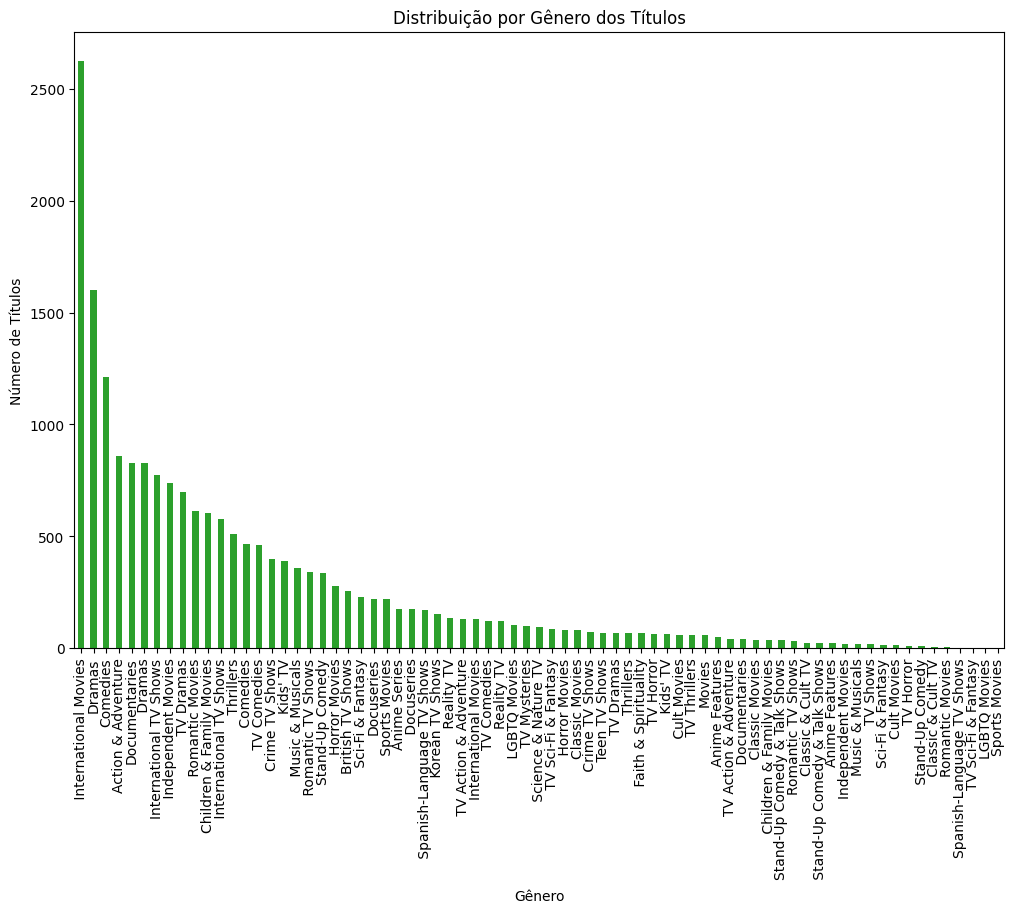

In [32]:
# Análise de Gêneros
df['listed_in'] = df['listed_in'].fillna('')
generos = df['listed_in'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
print("Distribuição por Gênero:")
print(generos)

# Visualização da Distribuição por Gênero
plt.figure(figsize=(12, 8))
generos.plot(kind='bar', color='#2ca02c')
plt.title('Distribuição por Gênero dos Títulos')
plt.xlabel('Gênero')
plt.ylabel('Número de Títulos')
plt.show()


Matriz de Correlações:
              duration  release_year
duration      1.000000     -0.249182
release_year -0.249182      1.000000


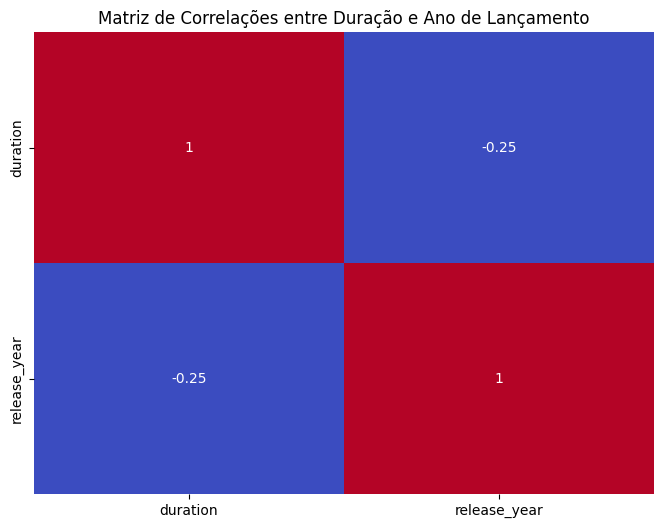

In [33]:
# Suponha que temos uma coluna 'duration' em minutos e 'rating' em algum formato numérico
# Convertendo a duração para minutos (se necessário)
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Análise de Correlações
correlacoes = df[['duration', 'release_year']].corr()
print("Matriz de Correlações:")
print(correlacoes)

# Visualização da Matriz de Correlações
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', cbar=False)
plt.title('Matriz de Correlações entre Duração e Ano de Lançamento')
plt.show()


Distribuição por País:
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
dtype: int64


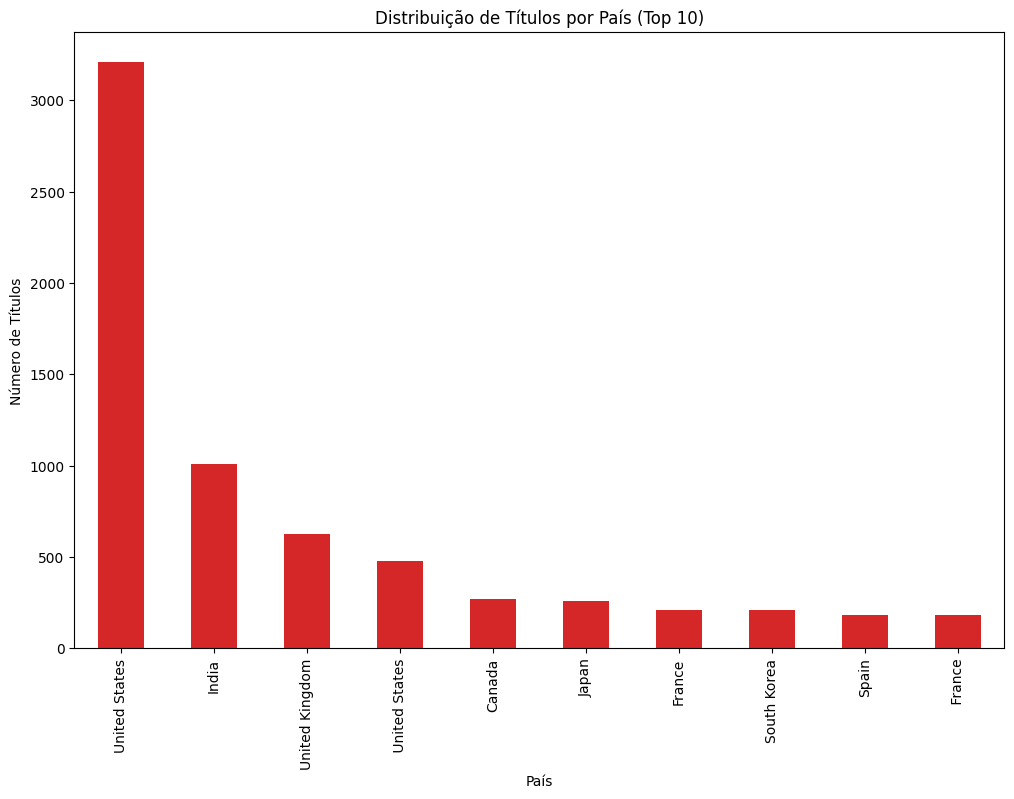

In [35]:
# Análise por País
df['country'] = df['country'].fillna('')
paises = df['country'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(10)
print("Distribuição por País:")
print(paises)

# Visualização da Distribuição por País
plt.figure(figsize=(12, 8))
paises.plot(kind='bar', color='#d62728')
plt.title('Distribuição de Títulos por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de Títulos')
plt.show()


Primeiro, apliquei técnicas de redução de dimensionalidade (PCA, SVD e Autoencoder) para entender melhor os dados. Em seguida, usei o K-Means para agrupar os títulos em clusters e calculei as distâncias entre esses clusters. Com isso, consegui visualizar os padrões e agrupamentos dos títulos.

Também analisei a distribuição dos tipos de conteúdo, mostrando que a maioria dos títulos são filmes, seguidos por séries. Verifiquei os anos de lançamento, observando um aumento significativo nos lançamentos recentes. Analisando os gêneros, descobri que Dramas e Comédias são os mais comuns. Por fim, explorei a distribuição dos títulos por país, com os Estados Unidos dominando, seguidos por Índia e Reino Unido.

Este notebook serve como uma ferramenta poderosa para realizar análises detalhadas e obter insights valiosos sobre o catálogo da Netflix. Ele combina técnicas de redução de dimensionalidade, clustering e análises exploratórias para fornecer uma visão abrangente do conteúdo disponível, permitindo identificar padrões, tendências e características dos títulos.